# Purpose of this notebook

To be a brief comparison to packages that provide more generic NLP functionality. 

These days there are quite a few, and we can only point out there is no shortage of choices.

We use spacy, as it seems like a convenient generic choice to us,
yet most of the things it does are also done - sometimes better - by other choices.
This list is not an endorsement of any - it ends up depending on how your purposes match their specialization.

Choices include, in no particular order:

- [spacy](https://spacy.io/usage/spacy-101) - see also our own [methods_nlp__spacy_basics](methods_nlp__spacy_basics.ipynb)
  - ~two dozen languages, including Dutch

- [pattern](https://github.com/clips/pattern)
  - 6 languages, including Dutch

- [flair](https://github.com/flairNLP/flair)
  - 4 languages, including Dutch

- [stanza](https://stanfordnlp.github.io/stanza/)
  - ~80 languages, including Dutch
  - and note there is e.g. a [spacy-stanza](https://spacy.io/universe/project/spacy-stanza/)

- [UDPipe](https://lindat.mff.cuni.cz/services/udpipe/)
  - various languages, including Dutch
  - and note there is a [spacy-udpipe](https://spacy.io/universe/project/spacy-udpipe)

- [alpino](https://www.let.rug.nl/vannoord/alp/Alpino/)
  - and note there is e.g. a [spacy-alpino](https://pypi.org/project/spacy-alpino/)

- [trankit](https://github.com/nlp-uoregon/trankit)
  - 50+ languages, including Dutch 
  - and note there is e.g. a [spacy-trankit](https://pypi.org/project/spacy-trankit/)

- [nltk](https://www.nltk.org/)
  - different components seem to support different languages, Dutch is not supported in all of them out-of-the-box
  - though [training basic support is relatively simple](https://stackoverflow.com/questions/40212895/nltk-tag-dutch-sentence)

- [textblob](https://textblob.readthedocs.io/en/dev/) 
  - language-extensible, but out of the box it seems to focus just on English
  - so no Dutch support, though [there's this](https://github.com/gvisniuc/textblob-nl)

- [CoreNLP](https://stanfordnlp.github.io/CoreNLP/)
  - 8 languages, no Dutch

- [NLP-Cube](https://github.com/Adobe/NLP-Cube)
  - 8 languags (?), no Dutch?

...in part just to mention them, in part to help you choose one.

# Some minimal examples

This is not highlighting any library's speciality, 
it's here primarily to highlight that the bare minimum in any of these libraries is simple to get started with.

You still need decide what you need most, and find out how well each of them does that.

In [1]:
import pprint

test = "Python is a high-level, general-purpose programming language. It can be quite useful."

## spacy

In [ ]:
!pip3 install -U spacy

In [5]:
import spacy
english_lg  = spacy.load('en_core_web_lg')   

ana = english_lg( test )

print( list( (tok.text, tok.pos_)  for tok in ana ) )
for sent in ana.sents:
    print( "SENT: ",sent)


[('Python', 'PROPN'), ('is', 'AUX'), ('a', 'DET'), ('high', 'ADJ'), ('-', 'PUNCT'), ('level', 'NOUN'), (',', 'PUNCT'), ('general', 'ADJ'), ('-', 'PUNCT'), ('purpose', 'NOUN'), ('programming', 'NOUN'), ('language', 'NOUN'), ('.', 'PUNCT'), ('It', 'PRON'), ('can', 'AUX'), ('be', 'AUX'), ('quite', 'ADV'), ('useful', 'ADJ'), ('.', 'PUNCT')]
SENT:  Python is a high-level, general-purpose programming language.
SENT:  It can be quite useful.


## Textblob

See also https://textblob.readthedocs.io/en/dev/quickstart.html

In [ ]:
!pip3 install -U textblob

In [6]:
from textblob import TextBlob

ana = TextBlob( test )

print(ana.tags)
print(ana.sentences)

[('Python', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('high-level', 'JJ'), ('general-purpose', 'JJ'), ('programming', 'NN'), ('language', 'NN'), ('It', 'PRP'), ('can', 'MD'), ('be', 'VB'), ('quite', 'RB'), ('useful', 'JJ')]
[Sentence("Python is a high-level, general-purpose programming language."), Sentence("It can be quite useful.")]


## NLTK

In [10]:
from nltk import word_tokenize, sent_tokenize, pos_tag

print( pos_tag( word_tokenize(test) ) )
print( sent_tokenize(test) )


[('Python', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('high-level', 'JJ'), (',', ','), ('general-purpose', 'JJ'), ('programming', 'NN'), ('language', 'NN'), ('.', '.'), ('It', 'PRP'), ('can', 'MD'), ('be', 'VB'), ('quite', 'RB'), ('useful', 'JJ'), ('.', '.')]
['Python is a high-level, general-purpose programming language.', 'It can be quite useful.']


## pattern

In [ ]:
!pip3 install pattern

In [13]:
from pattern.en import parse # in this project you'ld mainly use pattern.nl instead
ana = parse(test,
     tokenize = True,  
         tags = True,  
       chunks = True,  
    relations = True,
      #lemmata = True,  
        light = False)


In [14]:
pprint.pprint( ana.split() )


[[['Python', 'NNP', 'B-NP', 'O', 'NP-SBJ-1'],
  ['is', 'VBZ', 'B-VP', 'O', 'VP-1'],
  ['a', 'DT', 'B-NP', 'O', 'NP-OBJ-1'],
  ['high-level', 'JJ', 'I-NP', 'O', 'NP-OBJ-1'],
  [',', ',', 'I-NP', 'O', 'NP-OBJ-1'],
  ['general-purpose', 'JJ', 'I-NP', 'O', 'NP-OBJ-1'],
  ['programming', 'NN', 'I-NP', 'O', 'NP-OBJ-1'],
  ['language', 'NN', 'I-NP', 'O', 'NP-OBJ-1'],
  ['.', '.', 'O', 'O', 'O']],
 [['It', 'PRP', 'B-NP', 'O', 'NP-SBJ-1'],
  ['can', 'MD', 'B-VP', 'O', 'VP-1'],
  ['be', 'VB', 'I-VP', 'O', 'VP-1'],
  ['quite', 'RB', 'B-ADJP', 'O', 'O'],
  ['useful', 'JJ', 'I-ADJP', 'O', 'O'],
  ['.', '.', 'O', 'O', 'O']]]


## flair

In [ ]:
!pip3 install flair

In [ ]:
from flair.data import Sentence
from flair.nn import Classifier

# make a sentence
sentence = Sentence('De minister kan in Parijs opduiken.',language_code='nl')

# load the NER tagger
tagger = Classifier.load('ner')

# run NER over sentence
tagger.predict(sentence)

# print the sentence with all annotations
print(sentence)

2024-11-01 15:14:35,772 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
Sentence[7]: "De minister kan in Parijs opduiken." → ["Parijs"/LOC]


## CoreNLP

CoreNLP is a java server that can be queried from a java client.

...or libraries like [corenlp-client](https://pypi.org/project/corenlp-client/).

<!--
That means [its install](https://stanfordnlp.github.io/CoreNLP/download.html)

-->

See also https://stanfordnlp.github.io/CoreNLP/

# Combinations

There are various efforts to combine the outputs of different libraries, 
particularly where they achieve different things.

From what we've seen, many of these now seemsto be "let's duct tape it onto spacy" efforts,
which often tries to integrate it into spacy's "a Document is a series ot Tokens and Spans" view.

* some of these primarily put the same interface (a Document of Tokens and extra annotations) so that existing spacy code can, as-is, now talk to what under the covers is something else (e.g. spacy-stanza, spacy-udpipe) 
* Some of these are feature additions, e.g. adding specific annotations to existing pipelines 
* some are messier and definitely earn the 'duct taped' description.

Quite a few of these these can be found in [this project list](https://spacy.io/universe)

Note that the examples below are _not_ meant as a full list of options, just as examples of some added usefulness (_and_ of that duct tape).

## spacy-stanza 

https://spacy.io/universe/project/spacy-stanza


In [ ]:
# plain stanza already looks similar:
import stanza
stanza.download('nl')

In [ ]:
# for reference, this is what bare stanza outputs
nlp = stanza.Pipeline('nl',logging_level='ERROR')
doc = nlp("De minister kan in Parijs opduiken.") # run annotation over a sentence
print( doc )
#print( doc.entities )

[
  [
    {
      "id": 1,
      "text": "De",
      "lemma": "de",
      "upos": "DET",
      "xpos": "LID|bep|stan|rest",
      "feats": "Definite=Def",
      "head": 2,
      "deprel": "det",
      "start_char": 0,
      "end_char": 2,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 2,
      "text": "minister",
      "lemma": "minister",
      "upos": "NOUN",
      "xpos": "N|soort|ev|basis|zijd|stan",
      "feats": "Gender=Com|Number=Sing",
      "head": 6,
      "deprel": "nsubj",
      "start_char": 3,
      "end_char": 11,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 3,
      "text": "kan",
      "lemma": "kunnen",
      "upos": "AUX",
      "xpos": "WW|pv|tgw|ev",
      "feats": "Number=Sing|Tense=Pres|VerbForm=Fin",
      "head": 6,
      "deprel": "aux",
      "start_char": 12,
      "end_char": 15,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 4,
      "text": "i

[{
   "text": "Parijs",
   "type": "LOC",
   "start_char": 19,
   "end_char": 25
 }]

In [ ]:
!pip3 install spacy_stanza

In [ ]:
# spacy-stanza makes that act like spacy
import stanza
import spacy_stanza

stanza.download("nl")
nlp = spacy_stanza.load_pipeline("nl")

doc = nlp("De minister kan in Parijs opduiken.")
for token in doc:
    print( [token.text, token.lemma_, token.pos_, token.dep_, token.ent_type_] )
for ent in doc.ents:
    print( [ent.text, ent.label_] )

['De', 'de', 'DET', 'det', '']
['minister', 'minister', 'NOUN', 'nsubj', '']
['kan', 'kunnen', 'AUX', 'aux', '']
['in', 'in', 'ADP', 'case', '']
['Parijs', 'Parijs', 'PROPN', 'obl', 'LOC']
['opduiken', 'op_duiken', 'VERB', 'root', '']
['.', '.', 'PUNCT', 'punct', '']
['Parijs', 'LOC']


## spacy-benepar, and adding some nltk, why not

(Note that benepar does not have a Dutch model, so isn't directly relevant to this project)


Spacy has a dependency parser, but not a constituency parser.

Constituency parsers give the more classical "verb phrase containing a noun phrase" view on sentences. 
These have fallen out of style somewhat, and there isn't a high quality one for every language,
but they definitely still have their uses.

In [ ]:
!pip3 install benepar

In [ ]:
import benepar, spacy, nltk

bpname = 'benepar_en3'
benepar.download( bpname )

nlp = spacy.load('en_core_web_lg')
if spacy.__version__.startswith('2'):
    nlp.add_pipe(benepar.BeneparComponent(bpname))
else:
    nlp.add_pipe("benepar", config={"model":bpname})

doc = nlp("I like cheese and you like ham.")

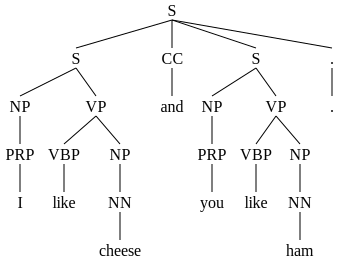

I like cheese and /
you like ham . /


In [ ]:
for sent in list(doc.sents):
    # let's estimate how wel we might split a senteence, using a constituency parse   
    # Instead of estimating clauses (which has plenty of edge cases),
    #   this basically counts the amount of brackets at each token position (and remembering that in terms of token index)
    #   Every time a bunch of brackets are closed at once, we decide we might split there.
    # You _can_ interrogate sent._.constituents for this, and this is arguably a less error-prone thing to do.
    #   For the example, though, we take the tree output out, as a string, and then parse that in nltk and do our work there.
    # Juggling different libraries like this invites some problems wherever your code duct tapes them together,
    #   this is here to show it's doable in principle

    # Along other things, spacy-benerar added sent._.parse_string.  nltk expects a slightly different markup format - round instand of square brackets
    nltk_tree = nltk.Tree.fromstring( sent._.parse_string.replace("[","(").replace("]",")") )
    display(nltk_tree) # nltk can show us that parse visually  (spacy-benepar doesn't seem to?)

    # will count into these. Defaultdict lets us skip the 'initialize with all indices in the list
    start_counts = [0]*(len(sent)+1) # +1 because the below is meant to allow [start:end] so end is one higher than the actual last index
    end_counts   = [0]*(len(sent)+1)

    for c in sent._.constituents:
        start_counts[c.start] += 1 
        end_counts[c.end] += 1 

    diffs   = list( end_counts[i] - start_counts[i] for i in range(min(len(end_counts), len(start_counts))) )
    maxdiff = max(diffs)

    for toki, tok in enumerate(sent):
        print( tok, end=' ' ) # print the word

        bracket_diff = diffs[toki]
        # print the amount of closing between this and the next word (basically, the amount that the tree depth decreases)
        #print( max(0,bracket_diff), end=' ') # negative means opening, right now we don't care about that so report it as zero

        # when we see a bunch of brackets,  or it being a considerable fraction of the depth differences overall (might work better in shallower trees)
        if bracket_diff >= 3    or  bracket_diff > 0.4*maxdiff: 
            print( '/' )

## spacy-alpino 

Alpino is a Dutch dependency parser. 

It looks like spacy's provided dutch models are based on alpino, 
so you may not care for doing this with extra steps,
until you have a specific reason to.

## spacy-udpipe

In [ ]:
!pip3 install spacy_udpipe

In [32]:
import spacy_udpipe
spacy_udpipe.download("nl")
nlp = spacy_udpipe.load("nl")

doc = nlp("De minister kan in Parijs opduiken.")
for token in doc:
    print( [token.text, token.lemma_, token.pos_, token.dep_, token.ent_type_] )
for ent in doc.ents:
    print( [ent.text, ent.label_] )

Already downloaded a model for the 'nl' language
['De', 'de', 'DET', 'det', '']
['minister', 'minister', 'NOUN', 'nsubj', '']
['kan', 'kunnen', 'AUX', 'aux', '']
['in', 'in', 'ADP', 'case', '']
['Parijs', 'Parijs', 'PROPN', 'obl', '']
['opduiken', 'opduiken', 'VERB', 'ROOT', '']
['.', '.', 'PUNCT', 'punct', '']
